input pulse =  <TransferFunction>: sys[444]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -0.5236
  -------
     s
plant transfer function =  <TransferFunction>: sys[443]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     -1.523
  -------------
  s^2 + 1.429 s
output Y =  <TransferFunction>: sys[445]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      0.7976
  ---------------
  s^3 + 1.429 s^2
input pulse =  <TransferFunction>: sys[446]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  1
  -
  1
plant transfer function =  <TransferFunction>: sys[443]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     -1.523
  -------------
  s^2 + 1.429 s
output Y =  <TransferFunction>: sys[447]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      0.7976
  ---------------
  s^3 + 1.429 s^2


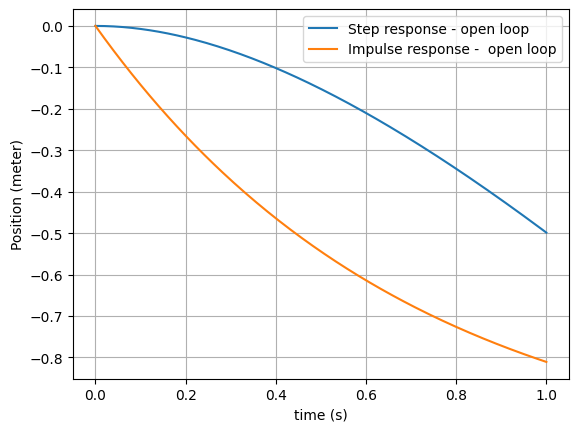

In [ ]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

# maybe change it to be theta and not alpha, because maybe not really plant.
# open loop plant (idk if cool?)
g = 9.81
d = 0.0375
L = 0.1725
b = 0.002 # total guess
m = 0.05 # weight of ball
R = 0.02

num = [-5/7*g*(d/L)] # this technically maps to alpha, that is, the angle of the motor, not that of the beam.
den = [1, (5*b)/(7*m*R), 0]

G_plant = tf(num, den)

# step response and pulse response:
step = tf([-np.pi/6],[1,0]) # make step an angle of -30 deg. note this is motor angle.
Y_step = G_plant * step
pulse = tf([1],[1])
Y_pulse = G_plant * step

# show actual equations
print('input pulse = ', step)
print('plant transfer function = ', G_plant)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('plant transfer function = ', G_plant)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_plant,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_plant,T=1,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)') # unsure if should be angle
plt.ylabel('Position (meter)')
plt.legend()


G_motor =  <TransferFunction>: sys[338]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            0.0274
  --------------------------
  1.32e-05 s^2 + 0.0007648 s
input step =  <TransferFunction>: sys[339]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
motor transfer function =  <TransferFunction>: sys[338]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            0.0274
  --------------------------
  1.32e-05 s^2 + 0.0007648 s
output Y =  <TransferFunction>: sys[340]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             0.0274
  ----------------------------
  1.32e-05 s^3 + 0.0007648 s^2
input pulse =  <TransferFunction>: sys[341]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  1
  -
  1
motor transfer function =  <TransferFunction>: sys[338]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            0.0274
  --------------------------
  1.32e-05 s^2 + 0.0007648 s
output Y =  <TransferFunction>: sys[342]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             0.0274
  --

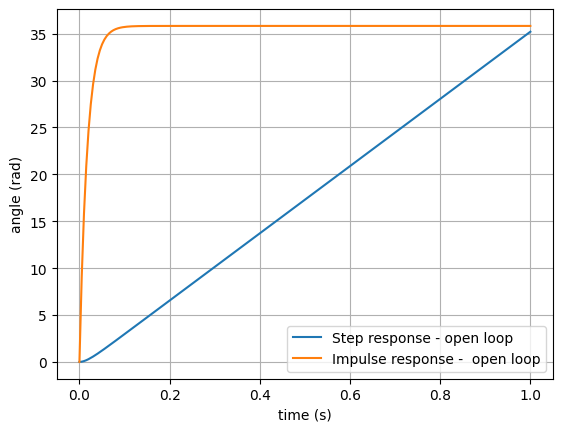

In [46]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

# open loop motor
# values taken from https://ctms.engin.umich.edu/CTMS/index.php?example=MotorPosition&section=SystemModeling
J = 3.3*10**-6
b_m = 3.5*10**-6
K = 0.0274
L_m = 0 # think if we neglect it, e.g; let it be 0
R_E = 4 # guess, could maybe also be ~12 or 20, need to check notes.

num = [K]
den = [J*L_m, (R_E*J)+(b_m*L_m), (K**2)+(b_m*R_E), 0]

G_motor = tf(num, den)

# step response and pulse response:
step = tf([1],[1,0]) # figire out of numerator value matters.
Y_step = G_motor * step
pulse = tf([1],[1])
Y_pulse = G_motor * step

# show actual equations
print('G_motor = ', G_motor)
print('input step = ', step)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('motor transfer function = ', G_motor)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_motor,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_motor,T=1,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.legend()


G_total = G_plant*G_motor <TransferFunction>: sys[347]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                  -0.04174
  -----------------------------------------
  1.32e-05 s^4 + 0.001236 s^3 + 0.02731 s^2
G_total =  <TransferFunction>: sys[347]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                  -0.04174
  -----------------------------------------
  1.32e-05 s^4 + 0.001236 s^3 + 0.02731 s^2
input pulse =  <TransferFunction>: sys[348]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  s
total transfer function =  <TransferFunction>: sys[347]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                  -0.04174
  -----------------------------------------
  1.32e-05 s^4 + 0.001236 s^3 + 0.02731 s^2
output Y =  <TransferFunction>: sys[349]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                  -0.04174
  -----------------------------------------
  1.32e-05 s^5 + 0.001236 s^4 + 0.02731 s^3
input pulse =  <TransferFunction>: sys[350]
Inputs (1): ['u[0]']
Outputs

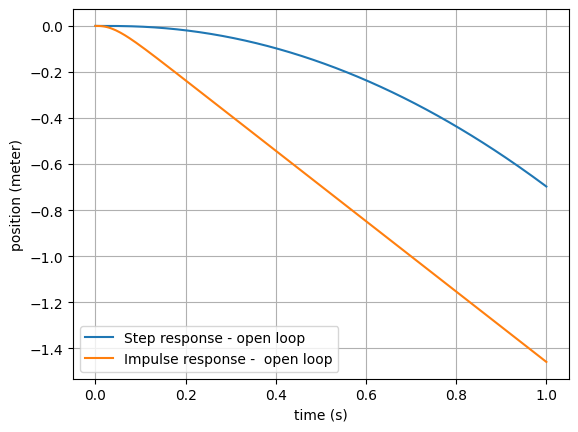

In [47]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt


# open loop plant+motor
G_total = G_plant*G_motor
print('G_total = G_plant*G_motor', G_total)
# maybe add response step, pulse, with/without IC

# step response and pulse response:
step =tf([1],[1,0])
Y_step = G_total * step
pulse =tf([1],[1])
Y_pulse = G_total * step

print('G_total = ', G_total)
# show actual equations
print('input pulse = ', step)
print('total transfer function = ', G_total)
print('output Y = ', Y_step)
print('input pulse = ', pulse)
print('total transfer function = ', G_total)
print('output Y = ', Y_pulse)

#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_total,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_total,T=1,T_num=200)
plt.plot(t,y, label='Step response - open loop')
plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('position (meter)')
plt.legend()






PID =  <TransferFunction>: sys[356]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  0.1 s^2 + 0.2 s
  ---------------
         s
G_controlled =  <TransferFunction>: sys[359]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                       -0.004174 s^2 - 0.008348 s
  ---------------------------------------------------------------------
  1.32e-05 s^5 + 0.001236 s^4 + 0.02731 s^3 - 0.004174 s^2 - 0.008348 s


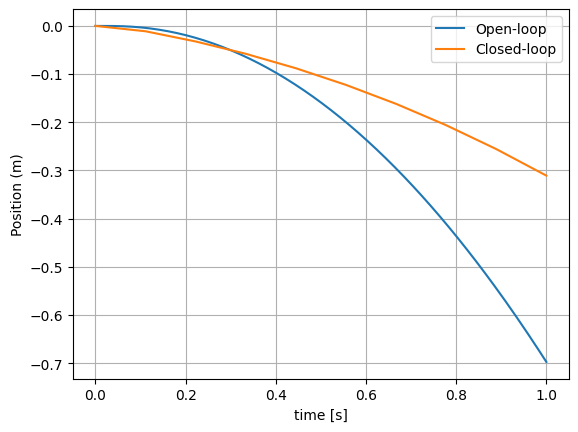

In [48]:
# add PI controller (now it is closed loop)
num = Kp,Ki,Kd=0.1,0.2,0 # idk if this way of defining is allowed. d = 0 because otherwise deg(num) > deg(den)
den = [1, 0]
controller = tf(num,den)
print('PID = ', controller)

G_control = controller*G_total
G_controlled = feedback(G_control,[1],-1)  #GF is forward gain, [1] is unity feedback loop with -1 indicating negative feedback

print('G_controlled = ', G_controlled)

t2, yc = step_response(G_controlled,T=1,T_num=10)
# t2, yc = step_response(Gtotf,T=10,T_num=200,X0=-0.0)  
plt.plot(t,y, label='Open-loop')
plt.plot(t2,yc, label='Closed-loop')
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('Position (m)')
plt.legend()

#impulse_response(g,T=10,T_num=200)




# TODO add bode plots and pole zero plot at what places?